In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# random seed

np.random.seed(42)

## Sample from an univariate normal distribution

In Numpy and Pytorch there are in-built functions `np.random.rand()` and `torch.randn()` to sample points from a standard normal distribution $z\sim\mathcal{N}(0, 1)$. 

If you still remember your Probability 101, you should know that sampling from a normal random variable $x\sim\mathcal{N}(\mu, \sigma^{2})$ starting from $z\sim\mathcal{N}(0, 1)$ is pretty straightforward.

You simply multiply the points sampled from $z$ by the desired standard deviation $\sigma$ (which is the square root of the variance $\sigma^2$) and add the desired mean value $\mu$, following the relation
\begin{equation*}
x = \sigma z + \mu.
\end{equation*}


In [3]:
# Univariate

mu = 10 # mean value
variance = 4
stddev = np.sqrt(variance)

n_points = 1000

z = np.random.randn(n_points)
x = mu + stddev*z

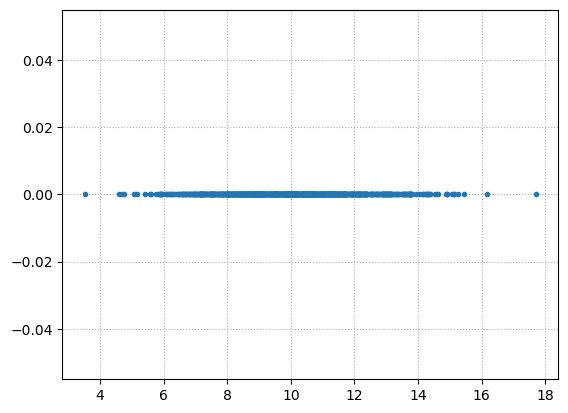

In [4]:
plt.figure()
plt.plot(x, np.zeros_like(z), '.')
plt.grid(linestyle=':')
plt.show()

## Sample from a multivariate normal distribution

The process is similar for multivariate distribution. You can start by sampling $m$ points independently from a standard normal distribution. This is the same as sampling from a standard normal vector with $m$ independent components having mean $\mathbf{0}_{m}$ and covariance matrix $I_{m}$, $\mathbf{z}\sim \mathcal{N}(\mathbf{0}_{m},\mathbf{I}_{m})$. 

Now suppose that we want to obtain a multivariate normal random vector with mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$, i.e., $\mathbf{x}\sim \mathcal{N}(\mathbf{\mu},\mathbf{\Sigma})$.

In order to do that, we apply a linear transformation to the vector $\mathbf{z}$, similarly to the univariate case,

\begin{equation*}
\mathbf{x} = \mathbf{L}\mathbf{z} + \mathbf{\mu}.
\end{equation*}

You probably recognize the pattern of summing $\mathbf{\mu}$, but you're probably also wondering what in the world is $\mathbf{L}$.

Well, in the univariate case we were multiplying $z$ by the standard deviation $\sigma$, which was the square root of the desired variance $\sigma^2$.

Here we would like to find a matrix $\mathbf{L}$ such that $\mathbf{LL}^{\top}=\mathbf{\Sigma}$, which is the "multivariate counterpart" of finding the square root. (If you're a mathematician and you're triggered by this layman's statement, I've added a more thorough explanation at the end of the notebook.)

If the desired vector has independent components (i.e., the covariance matrix is diagonal) this can be easily obtained by taking the square root of each component on the diagonal.

#### Example

To sample from a random vector

\begin{equation*}
\mathbf{x} \sim \mathcal{N} \left( \left[ \begin{matrix} 6 \\ -10  \end{matrix} \right], 
\left[ \begin{matrix} 4 & 0 \\ 0 & 9 \end{matrix} \right]  \right),
\end{equation*}

we first compute

\begin{equation*}
\mathbf{L} = \left[ \begin{matrix} 2 & 0 \\ 0 & 3 \end{matrix} \right]
\end{equation*}

and then we calculate
\begin{equation*}
\mathbf{x} = \mathbf{Lz} + \mathbf{\mu}
\end{equation*}

where $\mathbf{z}$ is sampled using `randn()`.

In [5]:
# Multivariate with independent components

mu = [6, -10]
variances = [4, 9]

mu = np.asarray(mu)
variances = np.asarray(variances)

sigma = np.diag(variances)
l_matrix = np.sqrt(sigma)

n_points = 1000

z = np.random.randn(2, n_points)
x = l_matrix @ z + mu[:, None]
x = x.T  # typically you want the shape to be (n_samples, n_components)

In [6]:
l_matrix

array([[2., 0.],
       [0., 3.]])

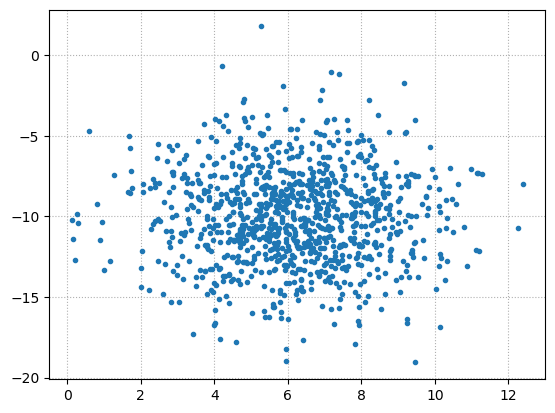

In [7]:
plt.figure()
plt.plot(x[:, 0], x[:, 1], '.')
plt.grid(linestyle=':')
plt.show()

When the components are not independent, meaning that $\mathbf{\Sigma}$ is not diagonal, we can't just take the square root of all the components.

Therefore, we need another way to find a matrix $\mathbf{L}$ such that $\mathbf{LL}^{\top} = \mathbf{\Sigma}$.

Luckily, some smart mathematician has already found a solution for us: the Cholesky decomposition finds a matrix having precisely the property that we want.

And we're even luckier because there is a Numpy implementation of this method, which the function `np.linalg.cholesky()`. 

In [8]:
# Multivariate with non-independent components

mu = [6, -10]
sigma = [[4, -3], [-3, 9]]

mu = np.asarray(mu)
sigma = np.asarray(sigma)
l_matrix = np.linalg.cholesky(sigma)

n_points = 1000

z = np.random.randn(2, n_points)
x = l_matrix @ z + mu[:, None]
x = x.T  # typically you want the shape to be (n_samples, n_components)

In [9]:
l_matrix

array([[ 2.        ,  0.        ],
       [-1.5       ,  2.59807621]])

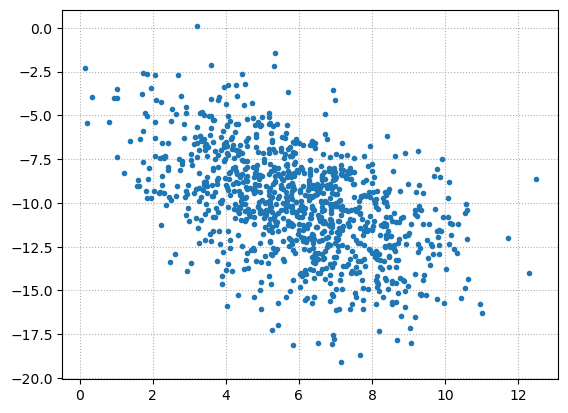

In [10]:
plt.figure()
plt.plot(x[:, 0], x[:, 1], '.')
plt.grid(linestyle=':')
plt.show()

### More formal explanation

We would like to obtain a random vector $\mathbf{x}\sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$ starting from a random vector $\mathbf{z}\sim \mathcal{N}(\mathbf{0}_{m}, \mathbf{I}_{m})$.

The PDF of $\mathbf{z}$ is
\begin{equation*}
p_{\mathbf{z}}(\mathbf{c}) = \frac{1}{(\sqrt{2\pi})^m} \exp\left( - \frac{c^{\top}c}{2} \right)
\end{equation*}

Let's consider the random vector $\mathbf{x}=\mathbf{L}\mathbf{z}+\mathbf{\mu}$. Notice that if $\mathbf{x}=\mathbf{a}$, then

\begin{equation*}
\mathbf{z}=\mathbf{L}^{-1}((\mathbf{L}\mathbf{z}+\mathbf{\mu}) - \mathbf{\mu}) = \mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}).
\end{equation*}

This implies that the PDF of $\mathbf{x}$ can be expressed in terms of the PDF of $\mathbf{z}$ using the "change of variable" theorem:

\begin{align}
p_{\mathbf{x}}(\mathbf{a}) &= p_{\mathbf{z}}(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu})) |\mathbf{L}^{-1}| \\
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}))^{\top}(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}))}{2} \right) \\ 
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}(\mathbf{L}^{-1})^{\top}\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right) \\
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}(\mathbf{L}\mathbf{L}^{\top})^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right).
\end{align}

Step $3$ is a straightforward application of Binet's theorem, whereas step $4$ uses the product of inverse matrices $B^{-1}A^{-1}=(AB)^{-1}$. $|\mathbf{L}|$ denotes the determinant of $\mathbf{L}$, for which holds the property $|\mathbf{L}^{-1}|=1/|\mathbf{L}|$.

Now, we know that the distribution of a multivariate normal vector with mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$ has PDF
\begin{equation*}
\frac{1}{(\sqrt{2\pi})^m \sqrt{|\mathbf{\Sigma}|}} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right),
\end{equation*}

so the only remaining step is choosing $\mathbf{L}$ such that $\mathbf{LL}^{\top}=\mathbf{\Sigma}$ using the Cholesky decomposition. Notice that this is possible only if $\mathbf{\Sigma}$ is positive semidefinite, which is a property that covariance matrices must always satisfy. Q.e.d., $\square$, whatever.

